In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd
import os

sns.set_context("talk")
sns.set_style("white")

%matplotlib inline

## Load the Data

In [2]:
output_dir = "./output/"
df = pd.read_csv("./data/1-cat.csv")
df['normalized'] = 100*df['count']/df['count_domain']
df.head()

,year,count,count_domain,category,normalized
0,2019,880,150708,Materials Science,0.583911
1,2018,438,165938,Materials Science,0.263954
2,2017,208,162121,Materials Science,0.128299
3,2016,99,147722,Materials Science,0.067018
4,2015,72,140425,Materials Science,0.051273


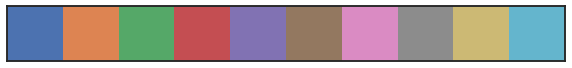

In [3]:
# Set plot time range
years = (2000, 2018)

# Set some marker defaults
marker_size = 150
marker_alpha = 0.6

# Set figure save parameters
fig_dpi = 1000

# Define plot sizes
golden = (4*1.618,4)

# Define palette options
colors = ["blue","orange","green"]
sns.set_palette("deep")
sns.palplot(sns.color_palette())

# Visualize with MatplotLib

## All Together

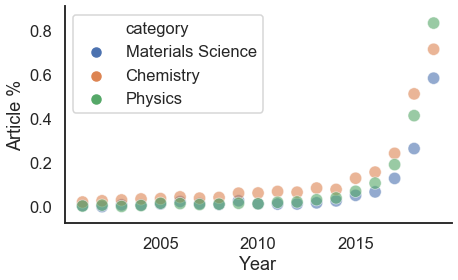

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.scatterplot(x="year", y="normalized",
                hue="category", data=data, 
                s=marker_size, alpha=marker_alpha,
                ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article %")
sns.despine()
plt.tight_layout()

fig.savefig(os.path.join(output_dir,'1-all-scatter-norm.png'),
            dpi=fig_dpi)

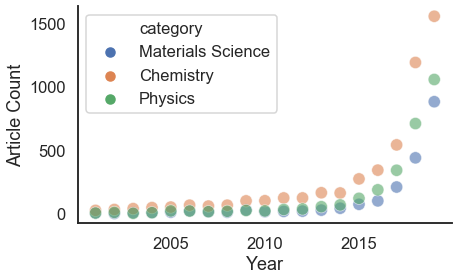

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.scatterplot(x="year", y="count",
                hue="category", data=data, 
                s=marker_size, alpha=marker_alpha,
                ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article Count")
sns.despine()
plt.tight_layout()

fig.savefig(os.path.join(output_dir,'1-all-scatter.png'),
            dpi=fig_dpi)

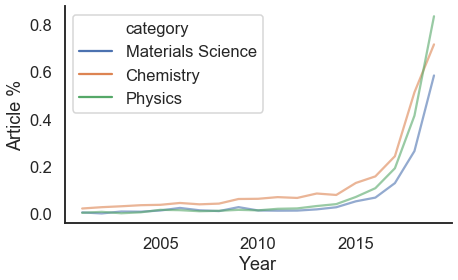

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.lineplot(x="year", y="normalized",
                  hue="category", data=data,
                  alpha=marker_alpha,
                 ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article %")
sns.despine()
plt.tight_layout()

fig.savefig(os.path.join(output_dir,'1-all-line-norm.png'),dpi=fig_dpi)

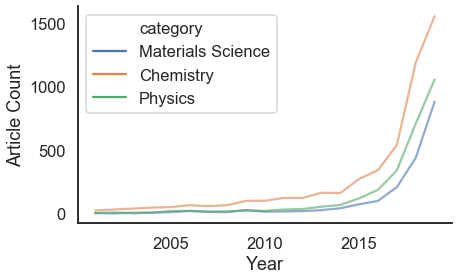

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.lineplot(x="year", y="count",
                  hue="category", data=data,
                  alpha=marker_alpha,
                 ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article Count")
sns.despine()
plt.tight_layout()

fig.savefig(os.path.join(output_dir,'1-all-line.png'),dpi=fig_dpi)

## Grid

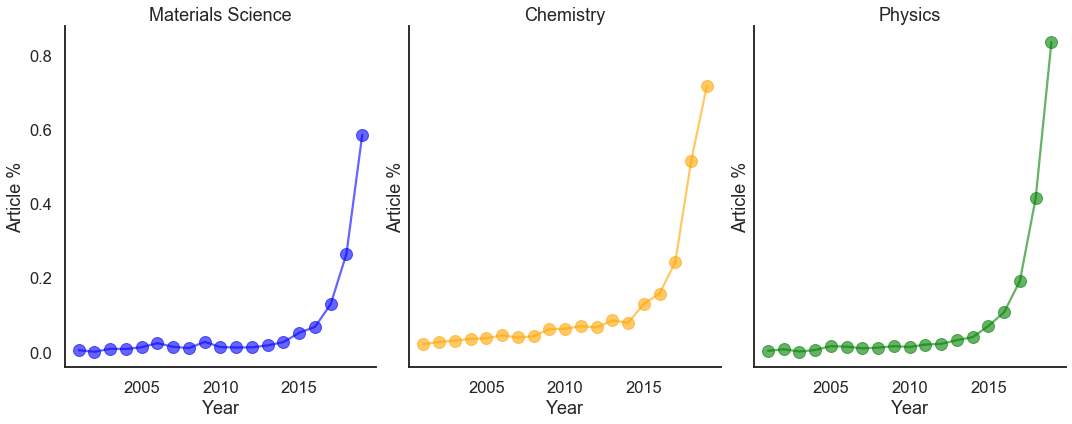

In [8]:
# Initialize a grid of plots with an Axes for each walk
categories = df['category'].unique()
f, axs = plt.subplots(1,len(categories), sharey=True, figsize=(15,6))

for i, cat in enumerate(categories):
    data = df[(df['category']==cat) & (df['year']>years[0])]
    axs[i].plot(data['year'], data['normalized'], 
                marker="o", markersize=12, color=colors[i], 
                alpha=marker_alpha) #c=colors[i], alpha=marker_alpha, s=marker_size)
    axs[i].set_title(cat)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Article %")
    sns.despine()
    plt.tight_layout()
f.savefig(os.path.join(output_dir,'1-grid-line-norm.png'),dpi=fig_dpi)

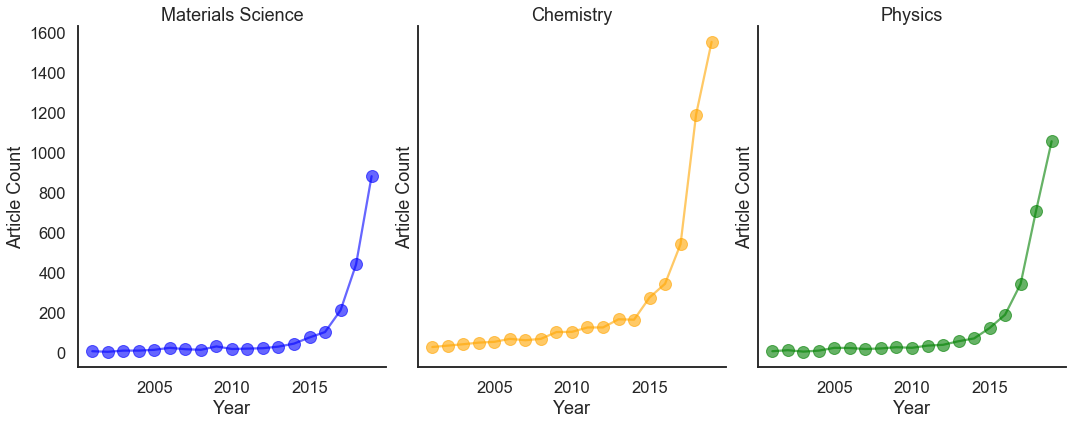

In [9]:
# Initialize a grid of plots with an Axes for each walk
categories = df['category'].unique()
f, axs = plt.subplots(1,len(categories), sharey=True, figsize=(15,6))

for i, cat in enumerate(categories):
    data = df[(df['category']==cat) & (df['year']>years[0])]
    axs[i].plot(data['year'], data['count'], 
                marker="o", markersize=12, color=colors[i], 
                alpha=marker_alpha) #c=colors[i], alpha=marker_alpha, s=marker_size)
    axs[i].set_title(cat)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Article Count")
    sns.despine()
    plt.tight_layout()
f.savefig(os.path.join(output_dir,'1-grid-line.png'),dpi=fig_dpi)

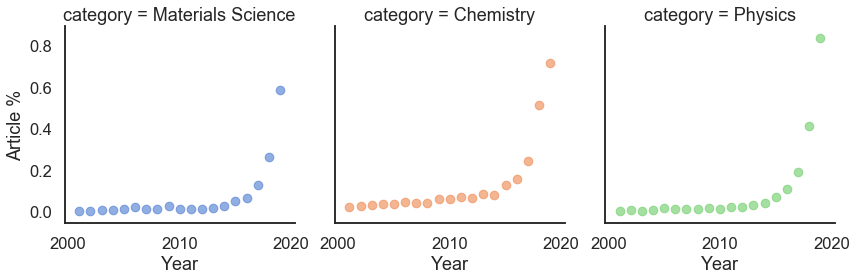

In [10]:
data = df[df['year']>years[0]]
sns_fig = sns.lmplot(x="year", y="normalized", col="category", 
           hue="category", data=data,
           col_wrap=3, ci=None, palette="muted", height=4, fit_reg=False,
           scatter_kws={"s": marker_size/2, "alpha": marker_alpha})
sns_fig.set_axis_labels("Year","Article %")
sns_fig.savefig(os.path.join(output_dir,"1-grid-norm.png"), dpi=fig_dpi)

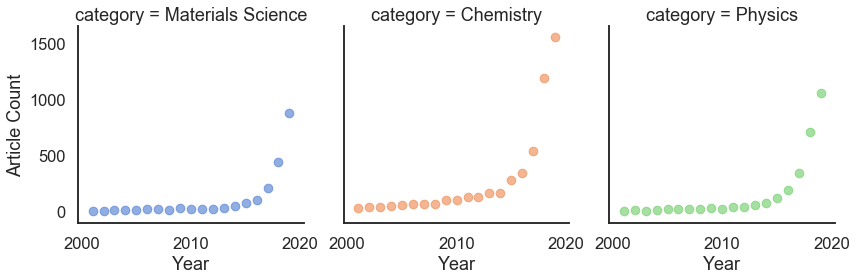

In [11]:
data = df[df['year']>years[0]]
sns_fig = sns.lmplot(x="year", y="count", col="category", 
           hue="category", data=data,
           col_wrap=3, ci=None, palette="muted", height=4, fit_reg=False,
           scatter_kws={"s": marker_size/2, "alpha": marker_alpha})
sns_fig.set_axis_labels("Year","Article Count")
sns_fig.savefig(os.path.join(output_dir,"1-grid.png"), dpi=fig_dpi)

# Individual

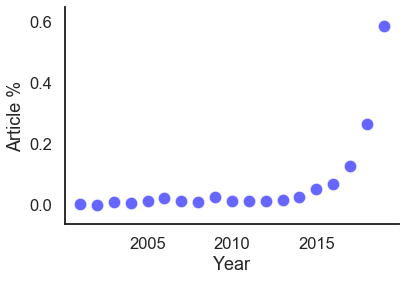

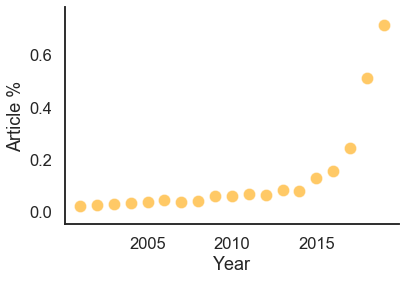

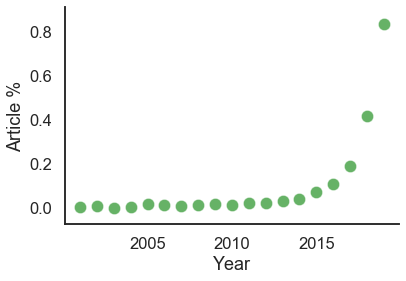

In [12]:
for i,category in enumerate(df['category'].unique()):
    fig = plt.figure()

    data = df[(df['category']==category) & (df['year']>years[0])]
    ax = sns.scatterplot(x="year", y="normalized",
                        data=data, s=marker_size, 
                        alpha=marker_alpha, color=colors[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Article %")
    sns.despine()
    fig.savefig(os.path.join(output_dir,'1-{}-norm.png'.format(category)),dpi=fig_dpi)

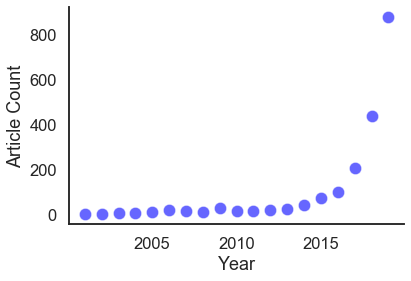

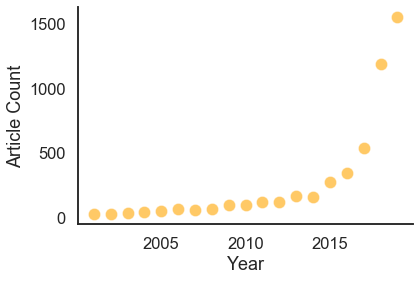

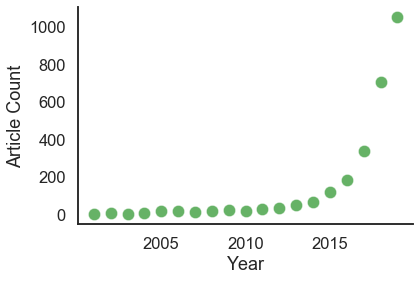

In [13]:
for i,category in enumerate(df['category'].unique()):
    fig = plt.figure()

    data = df[(df['category']==category) & (df['year']>years[0])]
    ax = sns.scatterplot(x="year", y="count",
                        data=data, s=marker_size, 
                        alpha=marker_alpha, color=colors[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Article Count")
    sns.despine()
    fig.savefig(os.path.join(output_dir,'1-{}.png'.format(category)),dpi=fig_dpi)

# Visualize with Altair

## All Together

In [14]:
data = df[df['category']=='Chemistry']

charts = []

for i, category in enumerate(df['category'].unique()):
    data = df[df['category']==category]
    chart = alt.Chart(data[['year','count']]).mark_circle(size=marker_size, color=colors[i]).encode(
        x=alt.X('year', scale=alt.Scale(domain=(2000, 2019))),
        y=alt.Y('count')).properties(
        width=500,
        height=350,
        title=category
    )
    charts.append(chart)

## All Together

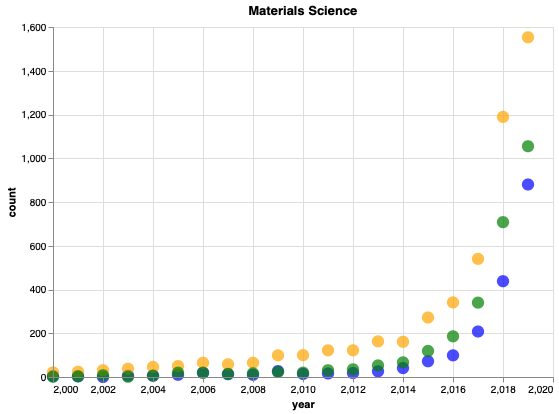

In [15]:
charts[0] + charts[1] + charts[2]

## Grid

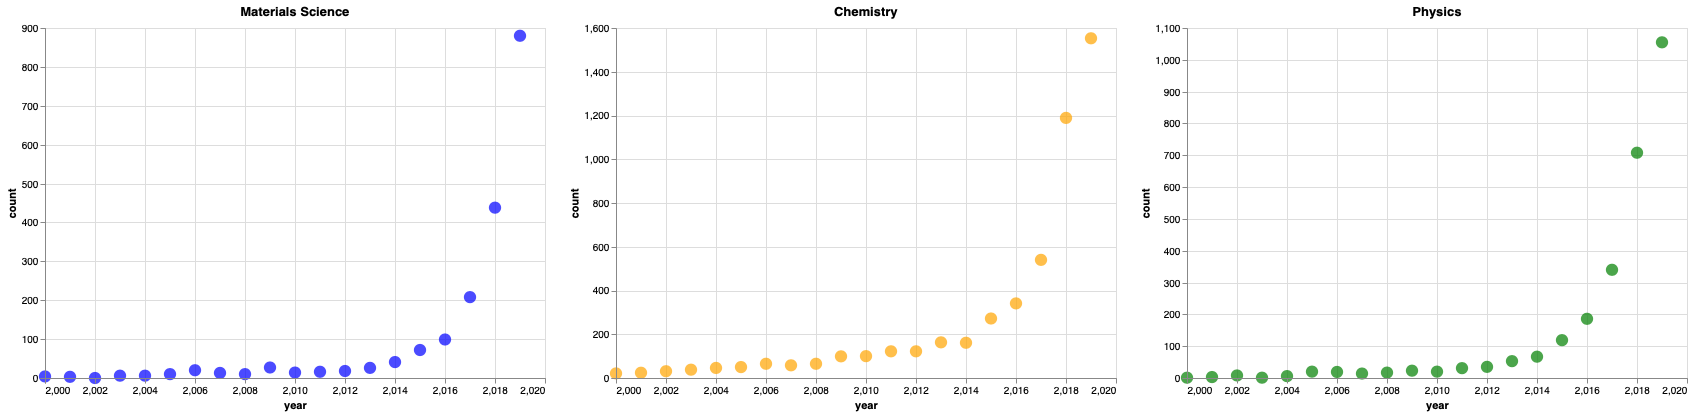

In [16]:
charts[0] | charts[1] | charts[2]

## Individual

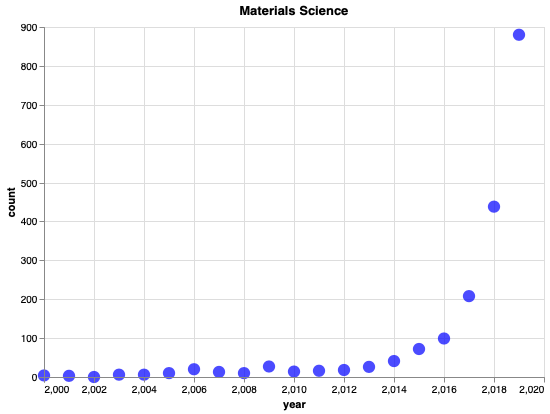

In [17]:
charts[0]

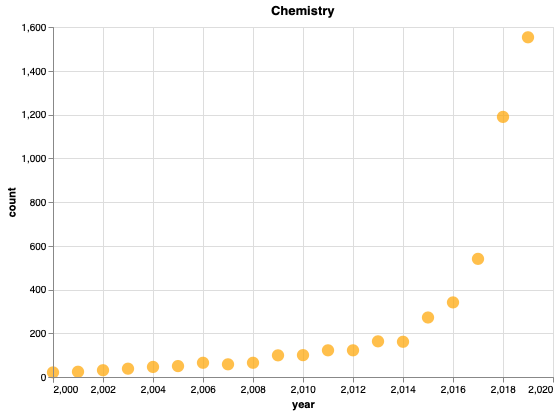

In [18]:
charts[1]

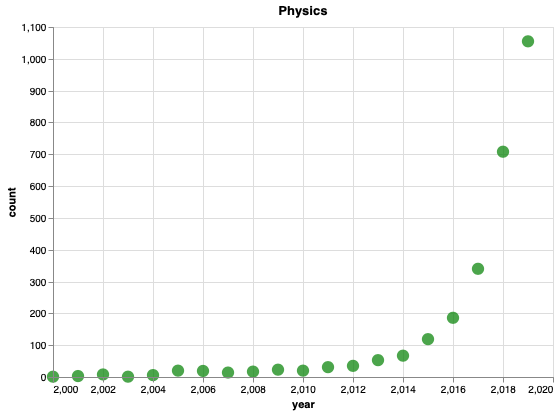

In [19]:
charts[2]